In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
dtype_dict = {'STATE_CODE_001': int,
 'STRUCTURE_NUMBER_008': str,
 'SERVICE_LEVEL_005C': int,
 'DIRECTION_005E': int,
 'FUNCTIONAL_CLASS_026': int,
 'YEAR_BUILT_027': int,
 'TRAFFIC_LANES_ON_028A': int,
 'TRAFFIC_LANES_UND_028B': int,
 'ADT_029': float,
 'MEDIAN_CODE_033': int,
 'DEGREES_SKEW_034': float,
 'STRUCTURE_FLARED_035': int,
 'OPEN_CLOSED_POSTED_041': str,
 'SERVICE_ON_042A': int,
 'SERVICE_UND_042B': int,
 'STRUCTURE_KIND_043A': int,
 'STRUCTURE_TYPE_043B': int,
 'APPR_KIND_044A': int,
 'APPR_TYPE_044B': int,
 'MAIN_UNIT_SPANS_045': float,
 'APPR_SPANS_046': float,
 'MAX_SPAN_LEN_MT_048': float,
 'STRUCTURE_LEN_MT_049': float,
 'DECK_COND_058': int,
 'SUPERSTRUCTURE_COND_059': int,
 'SUBSTRUCTURE_COND_060': int,
 'CHANNEL_COND_061': int,
 'CULVERT_COND_062': int,
 'OPERATING_RATING_064': float,
 'INVENTORY_RATING_066': float,
 'STRUCTURAL_EVAL_067': int,
 'DECK_GEOMETRY_EVAL_068': int,
 'UNDCLRENCE_EVAL_069': int,
 'WATERWAY_EVAL_071': int,
 'APPR_ROAD_EVAL_072': int,
 'DATE_OF_INSPECT_090': float,
 'INSPECT_FREQ_MONTHS_091': float,
 'TEMP_STRUCTURE_103': str,
 'YEAR_RECONSTRUCTED_106': float,
 'DECK_STRUCTURE_TYPE_107': int,
 'SURFACE_TYPE_108A': int,
 'MEMBRANE_TYPE_108B': int,
 'DECK_PROTECTION_108C': int,
 'PERCENT_ADT_TRUCK_109': float,
 'SCOUR_CRITICAL_113': int,
 'SUFFICIENCY_RATING': float,
 'YEAR': int,
 'FRACTURE_FLAG_092AF': int,
 'UNDWATER_FLAG_092BF': int,
 'SPEC_FLAG_092AF': int,
 'INSPECT_FLAG_090F': int,
 'REL_BRIGDE_AGE': float
}

In [3]:
# load data into pandas df
file_path = "D:/Scripts/bridges_project/data/masterBridges9.csv"

mylist = []

for chunk in pd.read_csv(file_path, dtype= dtype_dict, chunksize=1000):
    mylist.append(chunk)

big_data = pd.concat(mylist, axis= 0)
del mylist

In [4]:
big_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10208408 entries, 0 to 10208407
Data columns (total 50 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   STATE_CODE_001           int32  
 1   STRUCTURE_NUMBER_008     object 
 2   SERVICE_LEVEL_005C       int32  
 3   DIRECTION_005E           int32  
 4   FUNCTIONAL_CLASS_026     int32  
 5   YEAR_BUILT_027           int32  
 6   TRAFFIC_LANES_ON_028A    int32  
 7   TRAFFIC_LANES_UND_028B   int32  
 8   ADT_029                  float64
 9   MEDIAN_CODE_033          int32  
 10  DEGREES_SKEW_034         float64
 11  STRUCTURE_FLARED_035     int32  
 12  OPEN_CLOSED_POSTED_041   object 
 13  SERVICE_ON_042A          int32  
 14  SERVICE_UND_042B         int32  
 15  STRUCTURE_KIND_043A      int32  
 16  STRUCTURE_TYPE_043B      int32  
 17  APPR_KIND_044A           int32  
 18  APPR_TYPE_044B           int32  
 19  MAIN_UNIT_SPANS_045      float64
 20  APPR_SPANS_046           float64
 21  MAX_SP

In [5]:
big_data['OPEN_CLOSED_POSTED_041'].value_counts()

OPEN_CLOSED_POSTED_041
A    8686152
P    1282945
B     113980
R      41293
K      36863
D      20052
E      18284
G       8839
Name: count, dtype: int64

In [6]:
big_data = big_data.replace({'OPEN_CLOSED_POSTED_041': {'A': 1, 'B': 2, 'D': 4, 'E': 5, 'G': -1, 'K': 0, 'P': 16, 'R': 18}})

C:\Users\farrj\AppData\Local\Temp\ipykernel_24160\3822438887.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  big_data = big_data.replace({'OPEN_CLOSED_POSTED_041': {'A': 1, 'B': 2, 'D': 4, 'E': 5, 'G': -1, 'K': 0, 'P': 16, 'R': 18}})


In [7]:
#save new df as csv, just in case
import os
save_dir = "D:/Scripts/bridges_project/data"
save_name = "masterBridges10.csv"
save_path = os.path.join(save_dir, save_name)
big_data.to_csv(save_path, index= False)
# new dtype dict can have open_closed_posted as int type

In [ ]:
# split target and features

In [9]:
big_data['STRUCTURE_NUMBER_008_ID'] = pd.factorize(big_data['STRUCTURE_NUMBER_008'])[0]

In [11]:
big_data['STRUCTURE_NUMBER_008_ID'].value_counts()

STRUCTURE_NUMBER_008_ID
46822     115
46826     110
171779    110
46824     105
46828     100
         ... 
518146      1
518145      1
518144      1
518143      1
760552      1
Name: count, Length: 760553, dtype: int64

In [12]:
big_data['STRUCTURE_NUMBER_008'].value_counts()

STRUCTURE_NUMBER_008
000000000010040    115
000000000010070    110
000000000001110    110
000000000010060    105
000000000010090    100
                  ... 
000000017550560      1
000000017550550      1
000000017550540      1
000000017550530      1
         029491      1
Name: count, Length: 760553, dtype: int64

In [10]:
big_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10208408 entries, 0 to 10208407
Data columns (total 51 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   STATE_CODE_001           int32  
 1   STRUCTURE_NUMBER_008     object 
 2   SERVICE_LEVEL_005C       int32  
 3   DIRECTION_005E           int32  
 4   FUNCTIONAL_CLASS_026     int32  
 5   YEAR_BUILT_027           int32  
 6   TRAFFIC_LANES_ON_028A    int32  
 7   TRAFFIC_LANES_UND_028B   int32  
 8   ADT_029                  float64
 9   MEDIAN_CODE_033          int32  
 10  DEGREES_SKEW_034         float64
 11  STRUCTURE_FLARED_035     int32  
 12  OPEN_CLOSED_POSTED_041   int64  
 13  SERVICE_ON_042A          int32  
 14  SERVICE_UND_042B         int32  
 15  STRUCTURE_KIND_043A      int32  
 16  STRUCTURE_TYPE_043B      int32  
 17  APPR_KIND_044A           int32  
 18  APPR_TYPE_044B           int32  
 19  MAIN_UNIT_SPANS_045      float64
 20  APPR_SPANS_046           float64
 21  MAX_SP

## PCA w/Sufficiency Rating as Target

In [13]:
col_list = big_data.columns.tolist()
to_be_removed = ['SUFFICIENCY_RATING', 'STRUCTURE_NUMBER_008']
features = [item for item in col_list if item not in to_be_removed]

In [14]:
# get df of features
x = big_data.loc[:, features].values

In [15]:
# get df of target
y = big_data.loc[:,['SUFFICIENCY_RATING']].values

In [16]:
# standardize features
x = StandardScaler().fit_transform(x)

In [17]:
# pca
pca = PCA(.95)

principalComponents = pca.fit_transform(x)

In [ ]:
# get info

In [18]:
pca.explained_variance_ratio_

array([0.12571678, 0.08680644, 0.06264828, 0.0463872 , 0.04130106,
       0.03482821, 0.03168946, 0.02870923, 0.02837449, 0.02438656,
       0.02392489, 0.0232361 , 0.02233748, 0.02162993, 0.02130903,
       0.02118898, 0.02075848, 0.02048838, 0.02032169, 0.01963019,
       0.01941754, 0.01931691, 0.01784306, 0.01733133, 0.0156989 ,
       0.0155993 , 0.01488497, 0.01442464, 0.01422068, 0.01338563,
       0.01212954, 0.01158603, 0.0113185 , 0.01087575, 0.01038752,
       0.00959659])

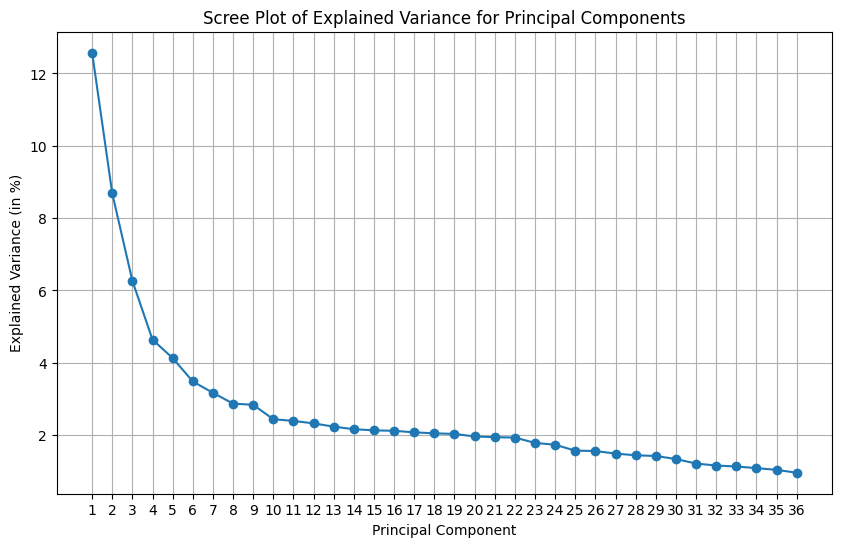

In [19]:
import matplotlib.pyplot as plt
# Get the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Set figsize
plt.figure(figsize=(10, 6))

# Create a scree plot to visualize the explained variance
plt.plot(range(1, len(explained_variance) + 1), # x-axis
         explained_variance*100, # convert explained variance in percentage
         marker='o', # add a marker at each value
        )

# Add title and axis label
plt.title('Scree Plot of Explained Variance for Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (in %)')

# Add label to x-axis
plt.xticks(range(1, len(explained_variance) + 1))

# Add grid in the background
plt.grid(True)

# Display the chart
plt.show();

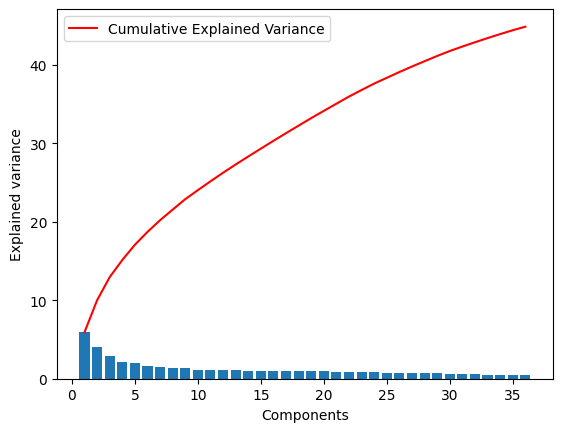

In [20]:
plt.bar(range(1,len(pca.explained_variance_ )+1),pca.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left');

It makes sense that not all variance is accounted for using the Sufficiency Rating as the target, as not all features used in the Sufficiency Rating calculation were kept in the data set.

Take a look at PCA w/condition ratings as targets.

## PCA w/Condition Ratings as Targets

In [21]:
col_list2 = big_data.columns.tolist()
to_be_removed2 = ['STRUCTURE_NUMBER_008', 'DECK_COND_058', 'SUPERSTRUCTURE_COND_059', 'SUBSTRUCTURE_COND_060', 'CHANNEL_COND_061',
 'CULVERT_COND_062']
features2 = [item for item in col_list2 if item not in to_be_removed2]
targets = ['DECK_COND_058', 'SUPERSTRUCTURE_COND_059', 'SUBSTRUCTURE_COND_060', 'CHANNEL_COND_061', 'CULVERT_COND_062']

In [22]:
# get df of features
x2 = big_data.loc[:, features2].values

In [23]:
# get df of target
y2 = big_data.loc[:,targets].values

In [24]:
# standardize features
x2 = StandardScaler().fit_transform(x2)

In [25]:
# pca
pca2 = PCA(.95)

principalComponents2 = pca2.fit_transform(x2)

In [26]:
pca2.explained_variance_ratio_

array([0.1099527 , 0.06739337, 0.05659274, 0.04968282, 0.04399396,
       0.03641908, 0.03402849, 0.03116447, 0.03071816, 0.0264463 ,
       0.02561714, 0.02481979, 0.02408771, 0.02339836, 0.02322493,
       0.02284145, 0.02249067, 0.02233357, 0.02163047, 0.02147049,
       0.02118604, 0.0198855 , 0.01946143, 0.01900223, 0.01712341,
       0.01663558, 0.01611443, 0.01560912, 0.01468606, 0.01401903,
       0.01272637, 0.01253151, 0.0122376 , 0.01126246, 0.0109838 ])

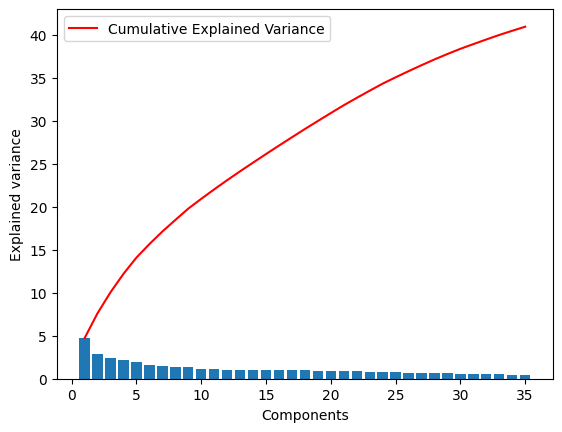

In [27]:
plt.bar(range(1,len(pca2.explained_variance_ )+1),pca2.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca2.explained_variance_ )+1),
         np.cumsum(pca2.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left');

PCA was not useful in removing features, let's look at correlation matrix before proceeding to modeling.

Although, this does possibly indicate that we are missing key features when predicting for overall bridge condition.

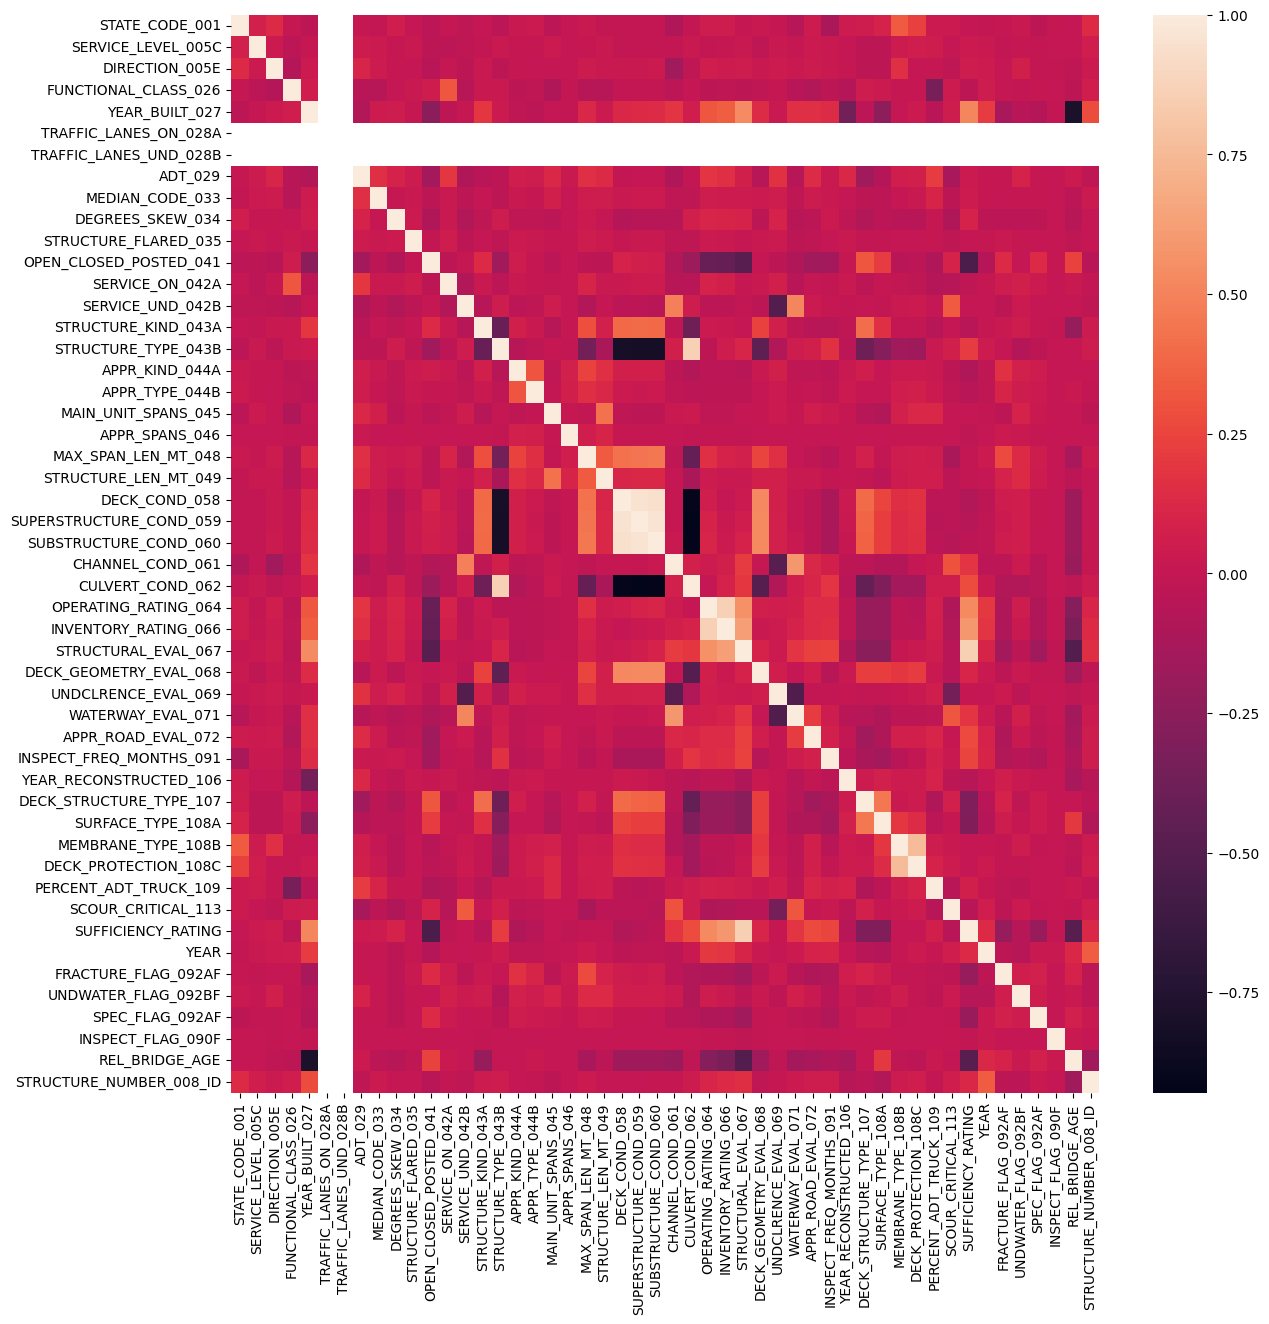

In [28]:
import seaborn as sns
# create correlation matrix
corr_db = big_data.corr(numeric_only= True)
fig = plt.figure(figsize= (14, 14))
sns.heatmap(corr_db.round(2), annot= False)
plt.show;

In [29]:
# drop structural eval, inventory rating, underclrence eval
high_corr_cols = ['STRUCTURAL_EVAL_067', 'INVENTORY_RATING_066', 'UNDCLRENCE_EVAL_069']
big_data = big_data.drop(columns= high_corr_cols)

In [30]:
big_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10208408 entries, 0 to 10208407
Data columns (total 48 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   STATE_CODE_001           int32  
 1   STRUCTURE_NUMBER_008     object 
 2   SERVICE_LEVEL_005C       int32  
 3   DIRECTION_005E           int32  
 4   FUNCTIONAL_CLASS_026     int32  
 5   YEAR_BUILT_027           int32  
 6   TRAFFIC_LANES_ON_028A    int32  
 7   TRAFFIC_LANES_UND_028B   int32  
 8   ADT_029                  float64
 9   MEDIAN_CODE_033          int32  
 10  DEGREES_SKEW_034         float64
 11  STRUCTURE_FLARED_035     int32  
 12  OPEN_CLOSED_POSTED_041   int64  
 13  SERVICE_ON_042A          int32  
 14  SERVICE_UND_042B         int32  
 15  STRUCTURE_KIND_043A      int32  
 16  STRUCTURE_TYPE_043B      int32  
 17  APPR_KIND_044A           int32  
 18  APPR_TYPE_044B           int32  
 19  MAIN_UNIT_SPANS_045      float64
 20  APPR_SPANS_046           float64
 21  MAX_SP

In [31]:
#save new df as csv, LAST TIME
save_dir = "D:/Scripts/bridges_project/data"
save_name = "masterBridgesFinal.csv"
save_path = os.path.join(save_dir, save_name)
big_data.to_csv(save_path, index= False)
# new dtype dict can have open_closed_posted as int type